In [16]:
import pymysql

connector = pymysql.connect(user='dev', password='ax2',host='127.0.0.1',port=3307,db='pythonexam')
cursor = connector.cursor()

query = ('SELECT country,deaths_1miopop from corona20200514 WHERE LENGTH(total_cases) > 6 and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s')
where_not = "North America", "Asia", "South America", "Europe", "World", "Total:", "Africa", "Oceania", "South Africa"
cursor.execute(query, where_not)

countries = []
total_deaths =[]
total = []
for country, totaldeaths in cursor:
    countries.append(country)
    deaths = totaldeaths.replace(',','')
    deaths_int = int(deaths)
    total_deaths.append(deaths_int)
    
cursor.close()
connector.close()

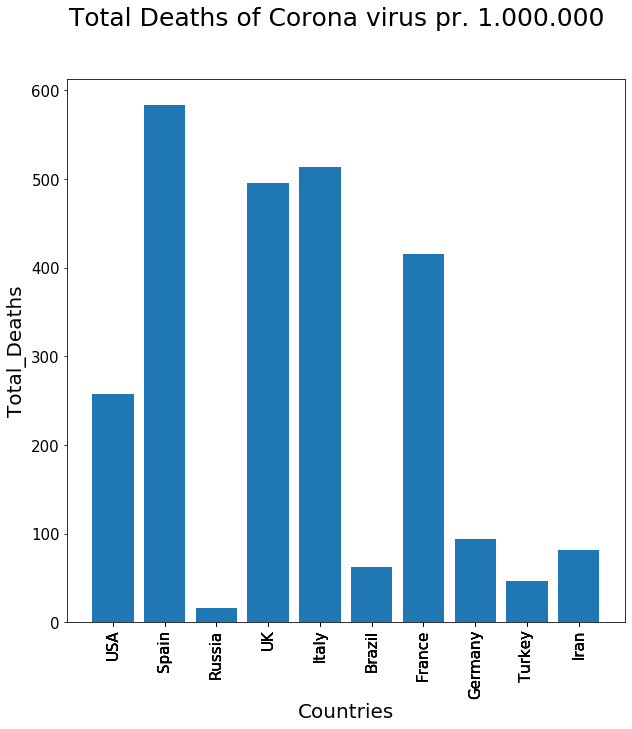

In [17]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,10))
plt.bar(countries,total_deaths)

figure.suptitle('Total Deaths of Corona virus pr. 1.000.000', fontsize=25)
plt.xlabel('Countries', fontsize=20)
plt.xticks(countries, rotation=90, fontsize=15)
plt.ylabel('Total_Deaths', fontsize=20)
plt.yticks(fontsize=15)

plt.show()

#figure.savefig('total_deaths_1mio_2020-05-14.jpg')